In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import geodesic

In [2]:
df = pd.read_csv('crime_data.csv')
df

,Crime_ID,Crime_Type,Location,Date,Time,Severity,Victim_Age,Victim_Gender,Weapon_Used,Reported_By,Response_Time(min),Arrest_Made,Latitude,Longitude
0,100,Sexual Assault,Home,2024-03-01,3:1,Low,26,Female,Gun,Victim,7,No,19.168772,79.112581
1,101,Sexual Assault,Workplace,2024-02-26,3:29,Moderate,38,Female,Gun,Witness,14,Yes,19.116575,79.196508
2,102,Eve Teasing,Street Corner,2024-02-12,21:52,Severe,38,Female,Blunt Object,Neighbor,18,Yes,19.071819,79.154009
3,103,Eve Teasing,Home,2024-02-26,6:56,Moderate,19,Female,Gun,Neighbor,6,Yes,19.084583,79.090034
4,104,Threats,Workplace,2024-02-21,10:6,Severe,19,Female,Acid,Neighbor,18,No,19.105012,79.102001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,245,Snatching,Concert Venue,2024-03-04,19:11,Low,35,Female,Knife,CCTV,10,No,19.163718,79.130637
146,246,Forced Entry,Parking Lot,2024-03-25,15:46,Low,38,Female,Knife,Witness,12,Yes,19.140042,79.051777
147,247,Harassment,Bus Stop,2024-03-22,14:28,Low,45,Female,Knife,Anonymous,15,No,19.154079,79.147496
148,248,Forced Entry,Apartment Complex,2024-01-17,23:16,Moderate,32,Female,Gun,Witness,17,Yes,19.135252,79.207027


In [3]:
df.drop(columns=["Date", "Time", "Victim_Age", "Victim_Gender", "Weapon_Used", "Reported_By", "Response_Time(min)", "Arrest_Made"], inplace=True)

In [4]:
df

,Crime_ID,Crime_Type,Location,Severity,Latitude,Longitude
0,100,Sexual Assault,Home,Low,19.168772,79.112581
1,101,Sexual Assault,Workplace,Moderate,19.116575,79.196508
2,102,Eve Teasing,Street Corner,Severe,19.071819,79.154009
3,103,Eve Teasing,Home,Moderate,19.084583,79.090034
4,104,Threats,Workplace,Severe,19.105012,79.102001
...,...,...,...,...,...,...
145,245,Snatching,Concert Venue,Low,19.163718,79.130637
146,246,Forced Entry,Parking Lot,Low,19.140042,79.051777
147,247,Harassment,Bus Stop,Low,19.154079,79.147496
148,248,Forced Entry,Apartment Complex,Moderate,19.135252,79.207027


In [5]:
print(df.isna().sum())

Crime_ID      0
Crime_Type    0
Location      0
Severity      0
Latitude      0
Longitude     0
dtype: int64


In [6]:
df

,Crime_ID,Crime_Type,Location,Severity,Latitude,Longitude
0,100,Sexual Assault,Home,Low,19.168772,79.112581
1,101,Sexual Assault,Workplace,Moderate,19.116575,79.196508
2,102,Eve Teasing,Street Corner,Severe,19.071819,79.154009
3,103,Eve Teasing,Home,Moderate,19.084583,79.090034
4,104,Threats,Workplace,Severe,19.105012,79.102001
...,...,...,...,...,...,...
145,245,Snatching,Concert Venue,Low,19.163718,79.130637
146,246,Forced Entry,Parking Lot,Low,19.140042,79.051777
147,247,Harassment,Bus Stop,Low,19.154079,79.147496
148,248,Forced Entry,Apartment Complex,Moderate,19.135252,79.207027


In [7]:
severity_mapping = {"Low": 1, "Moderate": 2, "Severe": 3}
df["Severity"] = df["Severity"].map(severity_mapping)

In [8]:
df

,Crime_ID,Crime_Type,Location,Severity,Latitude,Longitude
0,100,Sexual Assault,Home,1,19.168772,79.112581
1,101,Sexual Assault,Workplace,2,19.116575,79.196508
2,102,Eve Teasing,Street Corner,3,19.071819,79.154009
3,103,Eve Teasing,Home,2,19.084583,79.090034
4,104,Threats,Workplace,3,19.105012,79.102001
...,...,...,...,...,...,...
145,245,Snatching,Concert Venue,1,19.163718,79.130637
146,246,Forced Entry,Parking Lot,1,19.140042,79.051777
147,247,Harassment,Bus Stop,1,19.154079,79.147496
148,248,Forced Entry,Apartment Complex,2,19.135252,79.207027


In [9]:
coords = df[['Latitude', 'Longitude']].values

In [10]:
db = DBSCAN(eps=0.01, min_samples=3).fit(coords)
df["Cluster"] = db.labels_

In [11]:
df

,Crime_ID,Crime_Type,Location,Severity,Latitude,Longitude,Cluster
0,100,Sexual Assault,Home,1,19.168772,79.112581,8
1,101,Sexual Assault,Workplace,2,19.116575,79.196508,0
2,102,Eve Teasing,Street Corner,3,19.071819,79.154009,1
3,103,Eve Teasing,Home,2,19.084583,79.090034,-1
4,104,Threats,Workplace,3,19.105012,79.102001,2
...,...,...,...,...,...,...,...
145,245,Snatching,Concert Venue,1,19.163718,79.130637,-1
146,246,Forced Entry,Parking Lot,1,19.140042,79.051777,-1
147,247,Harassment,Bus Stop,1,19.154079,79.147496,-1
148,248,Forced Entry,Apartment Complex,2,19.135252,79.207027,0


In [12]:
print(df["Cluster"].unique())

[ 8  0  1 -1  2  3  4  5  6 12  7 11  9 10]


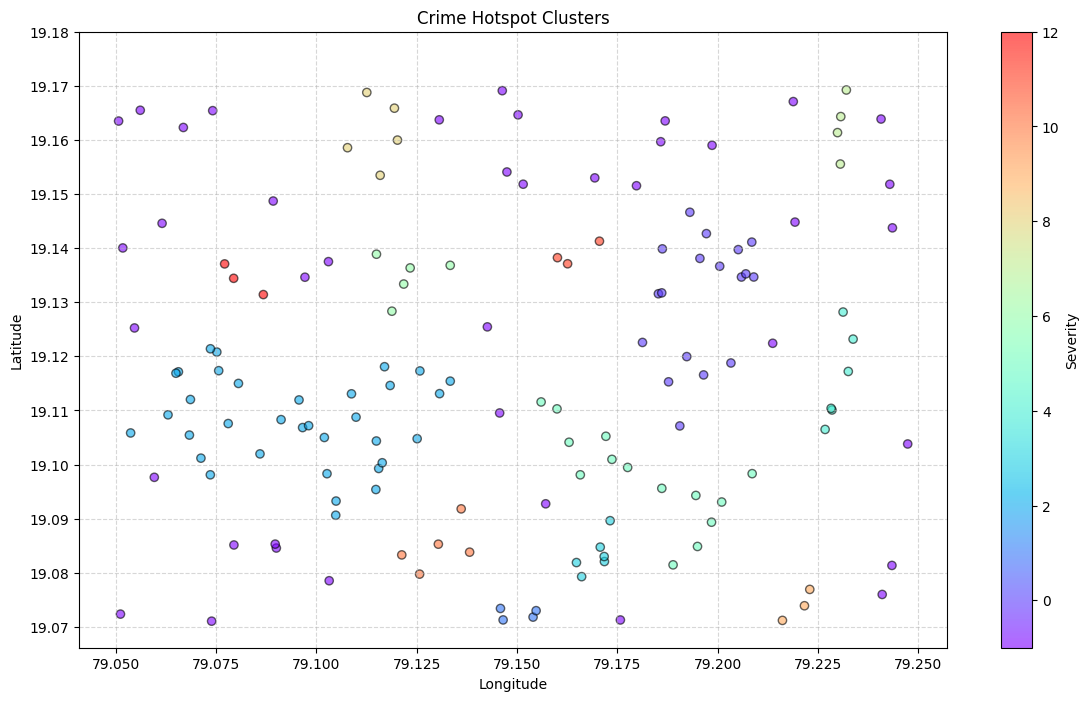

In [13]:
plt.figure(figsize=(14, 8))

scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df["Cluster"], cmap="rainbow", alpha=0.6, edgecolors='k')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Crime Hotspot Clusters")

current_y_ticks = plt.yticks()[0]  # Get current y-ticks
new_y_ticks = np.arange(round(min(df['Latitude']), 2), round(max(df['Latitude']), 2) + 0.01, 0.01)
plt.yticks(new_y_ticks)

plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(scatter, label='Severity')

plt.show()

In [14]:
def check_risk(user_location, crime_data, threshold=0.5):
    for _, row in crime_data.iterrows():
        crime_loc = (row["Latitude"], row["Longitude"])
        distance = geodesic(user_location, crime_loc).km
        if distance < threshold:
            return f"ALERT: {row['Crime_Type']} reported near you! Severity: {row['Severity']}"
    return "You are in a safe zone."

In [15]:
#userlat=random.randint(79.0500,79.2500)
#userlat

In [23]:
user_location = (19.0826, 79.1900)
print(check_risk(user_location, df[df["Cluster"] != -1]))

ALERT: Kidnapping reported near you! Severity: 2
